<a href="https://colab.research.google.com/github/thejaswini82/PROJECTS/blob/main/LOGISTIC_AND_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LOGISTIC REGRESSION - CLASSIFICATION TECHNIQUE

In [ ]:
#Take a dataset and create frame
#dataset - https://raw.githubusercontent.com/thejaswini82/DATASETS/main/autompg.csv

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/thejaswini82/DATASETS/main/autompg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df.shape


(398, 9)

In [ ]:
df.size

3582

In [ ]:
#input- weight and model year
#output- origin

In [ ]:
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [ ]:
x = df.iloc[:,4:6].values 
x

array([[3504. ,   12. ],
       [3693. ,   11.5],
       [3436. ,   11. ],
       [3433. ,   12. ],
       [3449. ,   10.5],
       [4341. ,   10. ],
       [4354. ,    9. ],
       [4312. ,    8.5],
       [4425. ,   10. ],
       [3850. ,    8.5],
       [3563. ,   10. ],
       [3609. ,    8. ],
       [3761. ,    9.5],
       [3086. ,   10. ],
       [2372. ,   15. ],
       [2833. ,   15.5],
       [2774. ,   15.5],
       [2587. ,   16. ],
       [2130. ,   14.5],
       [1835. ,   20.5],
       [2672. ,   17.5],
       [2430. ,   14.5],
       [2375. ,   17.5],
       [2234. ,   12.5],
       [2648. ,   15. ],
       [4615. ,   14. ],
       [4376. ,   15. ],
       [4382. ,   13.5],
       [4732. ,   18.5],
       [2130. ,   14.5],
       [2264. ,   15.5],
       [2228. ,   14. ],
       [2046. ,   19. ],
       [2634. ,   13. ],
       [3439. ,   15.5],
       [3329. ,   15.5],
       [3302. ,   15.5],
       [3288. ,   15.5],
       [4209. ,   12. ],
       [4464. ,   11.5],


In [ ]:
y = df.iloc[:,7].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1,
       3, 3, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 2, 3, 3, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 3, 1, 2,
       1, 2, 2, 2, 2, 3, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       3, 1, 1, 1, 1, 2, 3, 3, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 1, 2, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3, 2, 3,
       2, 3, 2, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1, 2, 1,

In [ ]:
#5.Train_test_split/train and test variables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
print(x.shape)
print(x_train.shape) 
print(x_test.shape) 

(398, 2)
(298, 2)
(100, 2)


In [ ]:
print(y.shape)
print(y_train.shape) #- 75%
print(y_test.shape) #- 25%

(398,)
(298,)
(100,)


In [ ]:
#AFTER NORMALISATION AND SCALING
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)



In [ ]:
#7.Apply Classifier, Regressor
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
#8.Fitting the model
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#9.Predict the output
y_pred = model.predict(x_test)
y_pred #PREDCITED VALUES

array([1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1])

In [ ]:
y_test

array([1, 1, 1, 2, 1, 3, 3, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       3, 2, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 3,
       3, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 2, 1, 3, 1, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 1, 1,
       2, 1, 1, 1, 3, 3, 2, 1, 1, 1, 1, 1])

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)* 100

69.0

In [ ]:
#Individual Prediction
a = scaler.transform([[4500,60]])

In [ ]:

model.predict(a)

array([1])

In [ ]:
a

array([[0.86463013, 3.1595092 ]])

In [ ]:
CONSLUION:
  #--> we had taken weight and model year  has input
  #--> we had taken origin has output
  #--> The had given x as input and y as output
  #--> From train_test_split, we get x and y train.shape of 75% 
  #--> and x and y test.shape of 25% 
  #--> By fitting the model output is predicted
  #--> Before Normalisation or Scaling, accuracy will be low(67)
  #--> After Normalisation or Scaling, accuracy will be high (69)
  #-->  we also get Individual Prediction
  #--> These analysis help us to now about more data
  #--> Model depends on nature of data as well as size of the data

In [ ]:
#Linear Regression
#NEW MODEL - Multiple Linear Regression/Multi Linear Regression/ Multivariate



In [ ]:
#Take a dataset and create data frame
#dataset - https://raw.githubusercontent.com/thejaswini82/DATASETS/main/titanic.csv

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/thejaswini82/DATASETS/main/titanic.csv')
df

,PassengerId,Age,Fare,Survived
0,1,22.0,7.2500,0
1,2,38.0,71.2833,1
2,3,26.0,7.9250,1
3,4,35.0,53.1000,1
4,5,35.0,8.0500,0
...,...,...,...,...
709,886,39.0,29.1250,0
710,887,27.0,13.0000,0
711,888,19.0,30.0000,1
712,890,26.0,30.0000,1


In [ ]:
df.shape

(714, 4)

In [ ]:
df.size

2856

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Age          714 non-null    float64
 2   Fare         714 non-null    float64
 3   Survived     714 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 22.4 KB


In [ ]:
df.head()

,PassengerId,Age,Fare,Survived
0,1,22.0,7.2500,0
1,2,38.0,71.2833,1
2,3,26.0,7.9250,1
3,4,35.0,53.1000,1
4,5,35.0,8.0500,0


In [ ]:
df.tail()

,PassengerId,Age,Fare,Survived
709,886,39.0,29.125,0
710,887,27.0,13.000,0
711,888,19.0,30.000,1
712,890,26.0,30.000,1
713,891,32.0,7.750,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


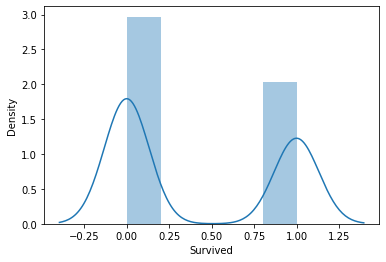

In [ ]:
#VISUALISATION
import seaborn as sns
sns.distplot(df['Survived']) #distribution plot

In [ ]:
#We want to consider only the numeric data
#So we will create a new dataframe with only numeric data
df_numeric = df.select_dtypes(include = ['float64','int64'])
df_numeric

,PassengerId,Age,Fare,Survived
0,1,22.0,7.2500,0
1,2,38.0,71.2833,1
2,3,26.0,7.9250,1
3,4,35.0,53.1000,1
4,5,35.0,8.0500,0
...,...,...,...,...
709,886,39.0,29.1250,0
710,887,27.0,13.0000,0
711,888,19.0,30.0000,1
712,890,26.0,30.0000,1


In [ ]:
#divide the data into i/p and o/p
#output - Survived
#input - Age and Fare column

In [ ]:
x = df_numeric.iloc[:,1:3].values
x

array([[22.    ,  7.25  ],
       [38.    , 71.2833],
       [26.    ,  7.925 ],
       ...,
       [19.    , 30.    ],
       [26.    , 30.    ],
       [32.    ,  7.75  ]])

In [ ]:
y = df_numeric.iloc[:,3].values
y

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [ ]:
#5.TRAIN and TEST VARIABLES
#sklearn.model_selection - package , train_test_split - library
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)


In [ ]:
print(x.shape) 
print(x_train.shape) 
print(x_test.shape)

(714, 2)
(535, 2)
(179, 2)


In [ ]:
print(y.shape) 
print(y_train.shape) 
print(y_test.shape) 

(714,)
(535,)
(179,)


In [ ]:
#6.SCALING or NORMALISATION -DONE ONLY FOR INPUTS
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
#7.RUN a CLASSIFIER/REGRESSOR/CLUSTERER
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#8.MODEL FITTING
model.fit(x_train,y_train)


LinearRegression()

In [ ]:
#9.PREDICT THE OUTPUT
y_pred = model.predict(x_test)#By taking the input testing data , we predict the output
y_pred #PREDICTED VALUES

array([0.39761324, 0.39213076, 1.19184161, 0.36137866, 0.48410719,
       0.41874757, 0.44722965, 0.50800588, 0.32773673, 0.52129927,
       0.38587524, 0.371426  , 0.47803549, 0.40806939, 0.40777335,
       0.30965066, 0.36900395, 0.51932647, 0.42355356, 0.3513365 ,
       0.38869047, 0.34777711, 0.52718015, 0.35663456, 0.35740009,
       0.51932647, 0.98599151, 0.72323875, 0.5980841 , 0.32984137,
       0.35042988, 0.61882409, 0.3997572 , 0.63715126, 0.34038772,
       0.31727419, 0.65145017, 0.42962349, 0.39278236, 0.44416112,
       0.39327443, 0.38892582, 0.54191609, 0.74251013, 0.36401006,
       0.46968459, 0.57303304, 0.71256057, 0.33568118, 0.40499106,
       0.28874992, 0.4047274 , 0.401168  , 0.69829002, 0.27454704,
       0.37534563, 0.47695371, 0.37458241, 0.25675008, 0.53909624,
       1.0695904 , 0.27837065, 0.46375458, 0.40115644, 0.80718169,
       0.37401925, 1.06247162, 0.35285369, 1.18799747, 0.66451746,
       0.38258931, 0.90644691, 0.42608376, 0.69046181, 0.96308

In [ ]:
y_test #ACTUAL VALUES

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0])

In [ ]:
print(x_train[10]) #these are scaled/normalised values


[0.33178781 0.05074862]


In [ ]:
#INDIVIDUAL PREDICTION
model.predict([x_train[10]])

array([0.39644185])

In [ ]:
#CROSS VERIFICATION TECHNIQUE
#y = mx + C # Equation of a Straight line
# y - Dependent variable
#x - Independent Variable
#m - slope
#C - Constant /Y -intercept

In [ ]:
m = model.coef_ # slope
m

array([-0.28325651,  1.3381839 ])

In [ ]:
type(m)

numpy.ndarray

In [ ]:
C = model.intercept_ # Y -intercept/constant
C

0.4225119146192239

In [ ]:
type(C)

numpy.float64

In [ ]:
#y = mx + C , x = 100
m * 100 + C

array([-27.90313875, 134.24090192])

In [ ]:
#CONCLUSION:

   #--> We had taken age and fare  has input
   #--> We had taken survived has output
   #--> The had given x as input and y as output
   #--> From visulastion we get plot
   #--> From train_test_split, we get x and y train.shape of 75% 
   #--> and x and y test.shape of 25% 
   #--> By fitting the model output is predicted
   #--> We also get Individual Prediction
   #--> By cross verification we can check our analysis
   #--> These analysis help us to now about more data
   #--> Model depends on nature of data as well as size of the data




In [ ]:
THANK YOU